In [3]:
import pandas as pd
import numpy as np
import os
import keras
import matplotlib.pyplot as plt
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet, MobileNetV2
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam

Using TensorFlow backend.


In [2]:
# Number of classes of our classification model
num_classes = 3


base_model=MobileNetV2(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(num_classes,activation='softmax')(x) #final layer with softmax activation   ACTUALITZAR EL NOMBRE DE CLASSES

Instructions for updating:
Colocations handled automatically by placer.


/Users/jordilinarespellicer/opt/anaconda3/envs/Unir/lib/python3.7/site-packages/keras_applications/mobilenet_v2.py:294: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


In [3]:
model=Model(inputs=base_model.input,outputs=preds)
#specify the inputs
#specify the outputs
#now a model has been created based on our architecture

In [4]:
for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

In [5]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input,validation_split=0.2) #included in our dependencies

train_generator=train_datagen.flow_from_directory('./train/', # this is where you specify the path to the main data folder
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True,
                                                 subset='training')
validation_generator=train_datagen.flow_from_directory('./train/', # this is where you specify the path to the main data folder
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True,
                                                 subset='validation')

Found 504 images belonging to 3 classes.
Found 125 images belonging to 3 classes.


In [13]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy

step_size_train=train_generator.n//train_generator.batch_size
step_size_validation=validation_generator.n//validation_generator.batch_size
history = model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                    validation_data = validation_generator,
                    validation_steps = step_size_validation,
                   epochs=2)

Epoch 1/2
15/15 [==============================] - 84s 6s/step - loss: 0.1842 - accuracy: 0.9831 - val_loss: 1.0074 - val_accuracy: 0.9583
Epoch 2/2
15/15 [==============================] - 76s 5s/step - loss: 0.0149 - accuracy: 0.9979 - val_loss: 6.5480 - val_accuracy: 0.6989


In [14]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, None, None, 3 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, None, None, 3 128         Conv1[0][0]                      
____________________________________________________________________________________________

In [15]:
def plot_acc(history, title="Model Accuracy"):
    """Imprime una gráfica mostrando la accuracy por epoch obtenida en un entrenamiento"""
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

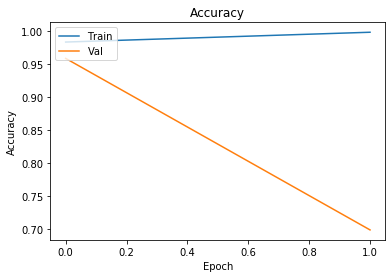

In [16]:
#plot_loss(history, title='Loss')
plot_acc(history, title='Accuracy')

In [17]:
model.save('model.h5')

In [4]:
%load_ext watermark

%watermark -v -m -p numpy, pandas, os, keras, matplotlib

%watermark -u -n -t -z

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark


UsageError: unrecognized arguments: pandas, os, keras, matplotlib
